# 분류모델

### 패키지 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import graphviz
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

### 파일경로 설정

In [2]:
# 데이터 
import os
os.chdir('/Users/2circlejun/Desktop/포스텍/수업 내용/빅데이터/회귀분석/2. Big Data 분석')
os.getcwd()

'/Users/2circlejun/Desktop/포스텍/수업 내용/빅데이터/회귀분석/2. Big Data 분석'

### 한글 폰트 및 옵션

In [3]:
matplotlib.rc('font', family = 'AppleGothic')
matplotlib.rc('axes', unicode_minus = False)

### 데이터 호출

In [4]:
df_raw = pd.read_csv('./유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 데이터 탐색


In [5]:
#데이터 형태
df_raw.shape

(320, 31)

In [6]:
#요약통계량
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

- ##### 결측치가 존재하지 않으며, 목표변수를 제외한 모든 변수의 데이터 타입이 float64인 것을 확인할 수 있다.

In [7]:
df_raw.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15.709703,20.323250,103.050469,807.735937,0.099358,0.123252,0.122144,0.066977,0.186772,0.062679,...,18.542406,27.225594,123.221625,1133.463438,0.137678,0.308713,0.352927,0.145487,0.305097,0.087156
std,3.745788,4.150729,25.835984,391.969297,0.014249,0.057207,0.084822,0.041732,0.027485,0.007190,...,5.182210,6.050052,35.960154,640.979627,0.023316,0.175225,0.214449,0.067292,0.069367,0.020076
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.026750,0.000000,0.000000,0.127400,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.085670,0.050360,0.000000,0.000000,0.156500,0.055040
25%,13.050000,17.460000,84.845000,523.900000,0.090240,0.081132,0.052770,0.029538,0.166900,0.057450,...,14.657500,23.275000,95.525000,653.525000,0.122675,0.180275,0.182950,0.090868,0.258700,0.073475
50%,15.125000,20.215000,100.100000,713.050000,0.098570,0.115300,0.110850,0.065265,0.184650,0.061445,...,17.730000,26.880000,118.850000,969.200000,0.138050,0.276950,0.339750,0.152700,0.295800,0.082640
75%,18.520000,22.500000,121.550000,1075.250000,0.108050,0.155650,0.169550,0.091777,0.202700,0.066705,...,22.420000,30.937500,148.850000,1538.500000,0.151200,0.405675,0.483675,0.197100,0.328125,0.097745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


- ##### 모든 변수들의 평균값을 살펴보니, 데이터의 평균값이 매우 상이한 것을 볼 수 있다.

In [8]:
df_raw.diagnosis.value_counts(normalize = True)

음성    0.6625
양성    0.3375
Name: diagnosis, dtype: float64

- ##### 목표변수의 비율을 살펴보니 다음과 같이 음성, 양성 비율이 2: 1로 구성되어 있는 것을 확인할 수 있다.

### 데이터 전처리

In [9]:
# 결측치 빼오기
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

- area_error, worst_area 부분에 IQR을 넘어서는 이상치가 있는 것으로 파악되나, 해당  이상치에 여러 데이터가 분포하고 있으며 해당 데이터의 변수에 대한 충분한 의학적 지식이 있지 않기 때문에 제거하지 않는다.

- diagnosis 변수는 범주형이므로, 음성에 0, 양성에 1을 할당한다.

In [10]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [11]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 데이터 분할

문제에서 명시된 비율대로 트레이닝, 테스트 데이터 비율을 6:4로 나눠준다

In [12]:
df_raw_x = df_raw.drop('diagnosis', axis= 1, inplace= False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size= 0.4)


- 데이터 확인결과 잘 나눠진 것을 확인할 수 있다.

In [13]:
print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

(192, 30)
(128, 30)
(192,)
(128,)


- #### 음성과 양성의 비율이 2:1로 극단적인 차이가 나지 않기에 오버 샘플링이 매우 필요한 상황은 아니지만 복습을 위해 진행

In [14]:
sm = SMOTE(sampling_strategy='auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

## 의사결정나무

### 모델 생성

In [15]:
tree_uncustomized = DecisionTreeClassifier()
tree_uncustomized.fit(df_train_x, df_train_y)


print('Accuarcy on training set : ', tree_uncustomized.score(df_train_x, df_train_y))
print('Accuarcy on training set : {:.3f} '.format(tree_uncustomized.score(df_test_x, df_test_y)))



Accuarcy on training set :  1.0
Accuarcy on training set : 0.953 


트레이닝 데이터 셋에 대한 성능이 93%이므로 매우 과적합 된 상태인 것을 확인할 수 있다.

## 모델 parameter 조정

#### 최대 깊이 변경에 따른 모델 성능

In [239]:
train_accuracy = [] ; test_accuracy = []
para_depth = [depth for depth in range(1,11)]


for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth= v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))


df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuract'] = test_accuracy




In [240]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuract
0,1,0.917,0.906
1,2,0.958,0.930
2,3,0.974,0.945
3,4,0.995,0.945
4,5,1.000,0.945
5,6,1.000,0.945
6,7,1.000,0.945
7,8,1.000,0.945
8,9,1.000,0.945
9,10,1.000,0.945


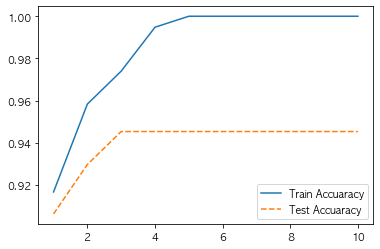

In [241]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuaracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuaracy')
plt.legend()

모델 깊이에 따른 성능이 3부터 차이가 나지 않으므로 depth를 4로 설정한다.

#### 시각화를 위해 모델 성능을 GraphViz로 시각화

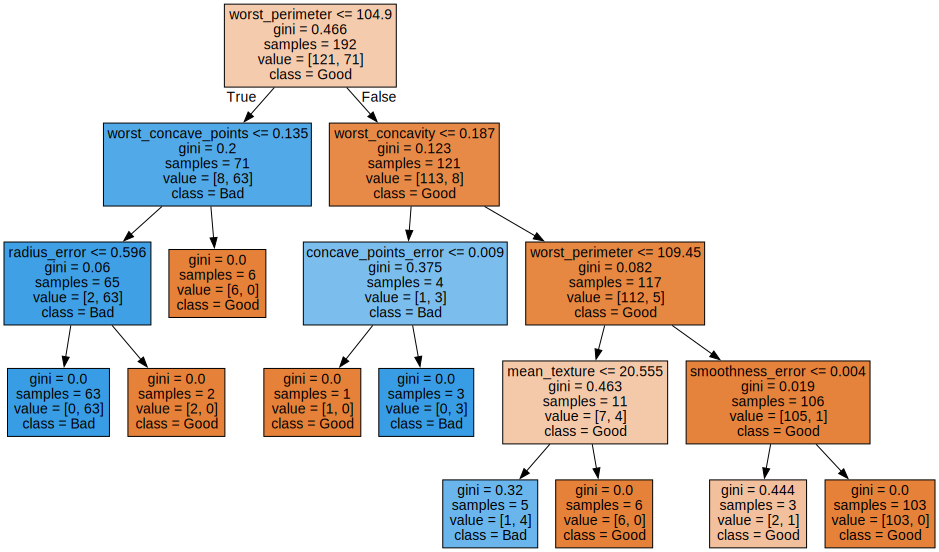

In [242]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth=4)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names= v_feature_name, impurity= True, filled= True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [243]:
train_accuracy = [] ; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]


for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(max_depth= 4, min_samples_split= v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))


df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuract'] = test_accuracy

   MinSampleSplit  TrainAccuracy  TestAccuract
0              10          0.990         0.914
1              20          0.969         0.930
2              30          0.969         0.930
3              40          0.969         0.930
4              50          0.969         0.930
5              60          0.969         0.930
6              70          0.958         0.930
7              80          0.927         0.891
8              90          0.927         0.891
9             100          0.927         0.891


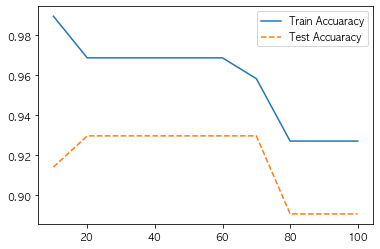

In [244]:
print(df_accuracy_split.round(3))
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuaracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuaracy')
plt.legend()

- 분리노드 20에서 급격한 성능 하락이 진행되므로 분리 노드의 최소 자료 수는 20으로 지정

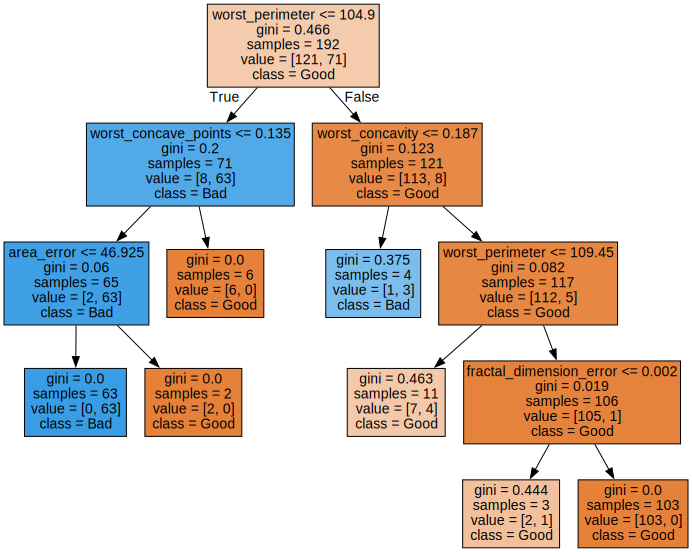

In [245]:
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=20)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names= v_feature_name, impurity= True, filled= True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [247]:
train_accuracy = [] ; test_accuracy = []
para_leaf = [n_split * 2 for n_split in range(1,11)]


for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth= 4, min_samples_split= 20, min_samples_leaf= v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))


df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuract'] = test_accuracy

   MinSamplesLeaf  TrainAccuracy  TestAccuract
0               2          0.969         0.930
1               4          0.958         0.930
2               6          0.969         0.945
3               8          0.958         0.953
4              10          0.948         0.930
5              12          0.938         0.930
6              14          0.917         0.906
7              16          0.917         0.906
8              18          0.917         0.906
9              20          0.917         0.906


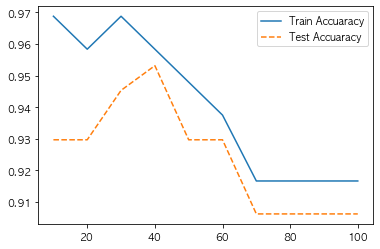

In [248]:
print(df_accuracy_leaf.round(3))
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuaracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuaracy')
plt.legend()

- 분리노드 40에서 성능 하락이 진행되므로 잎사귀 노드의 최소 자료 수는 40로 지정

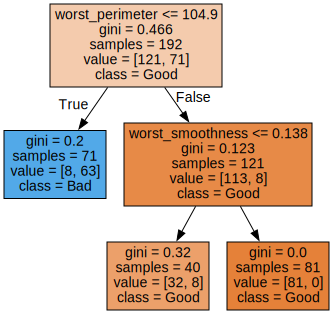

In [250]:
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=40)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names= v_feature_name, impurity= True, filled= True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 모델 설정

In [252]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=40)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=20)

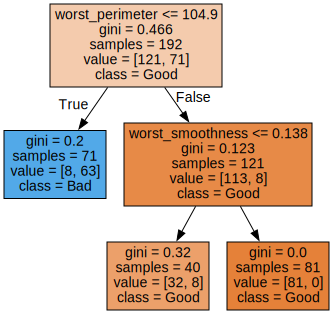

In [253]:
export_graphviz(tree_low, out_file='tree_final.dot', class_names=['Good', 'Bad'],
                feature_names= v_feature_name, impurity= True, filled= True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종 모델을 통한 분류 예측

In [257]:
y_pred = tree_final.predict(df_test_x)
print('accuarcy : {:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('confusion_matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred))

accuarcy : 0.906
confusion_matrix: 
[[84  7]
 [ 5 32]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        91
           1       0.82      0.86      0.84        37

    accuracy                           0.91       128
   macro avg       0.88      0.89      0.89       128
weighted avg       0.91      0.91      0.91       128



## 혼동행렬
| Header 1 | 음성 | 양성 |
|----------|----------|----------|
| 음성   | TN   | FP   |
| 양성   | FN   | TP   |

- test 데이터 기준 정분류율을 90.6%로 높은 성능을 보인다.
- precision은 양성 기준으로 82%로 상당히 높은 편인 것을 알 수 있음
다만 파이썬은 양성 음성 순이 아니라 음성 양성 순의 혼동행렬만 지원하므로 주의해야한다.


* 정밀도(Precision) : Positive로 예측한 경우 중 실제로 Positive인 비율
* 재현율(Recall) : 실제 Positive인 것 중 올바르게 Positive를 맞춘 것의 비율





## 결론도출

In [258]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['importance'] = tree_final.feature_importances_

df_importance.sort_values('importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.966
23,worst_area,0.034
0,mean_radius,0.000
1,mean_texture,0.000
28,worst_symmetry,0.000
27,worst_concave_points,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
21,worst_texture,0.000


worst_perimeter의 설명변수가 영향이 가장 큰 것을 확인할 수 있다

Text(0, 0.5, '설명변수')

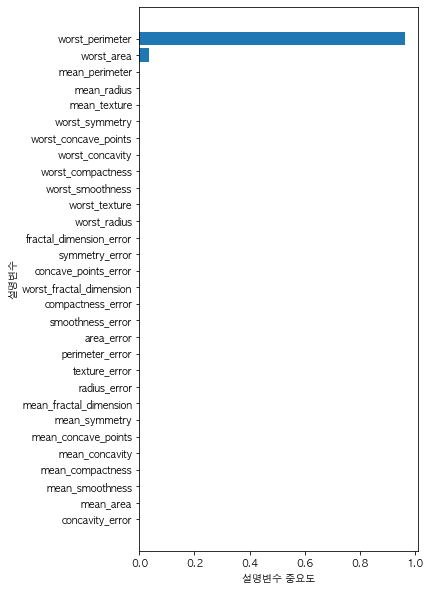

In [266]:
df_importance.sort_values('importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize = (5,10))
plt.barh(y = coordinates, width = df_importance['importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### gridSearch를 통한 최적 parameter 찾기

In [268]:
estimator = DecisionTreeClassifier()

param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model : {}'.format(grid_dt.best_estimator_))
print('nbest parameter : {}'.format(grid_dt.best_params_))
print('nbest score : {}'.format(grid_dt.best_score_.round(3)))

best estimator model : DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=30)
nbest parameter : {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 30}
nbest score : 0.911


- 최적의 코드는 다음과 같으며, grid search 스코어가 0.5% 더 높은 것을 확인 할 수 있다.

# 그리드 서치를 통한 최종 값으로 범주 예측하기

In [299]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=30, min_samples_leaf=2)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=30)

In [312]:
pred = tree_final.predict(df_raw_x)
print(len(pred))
pred

320


array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

예측값이 생성되었다

In [314]:
sum(df_raw_y == pred)

305

In [315]:
305/320

0.953125

320 개 중 305 개를 맞췄다. 정확도는 95.3%

---

# 랜덤포레스트

### 모델 생성

In [274]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.938


### 트리수 변경에 따른 모델 성능

In [275]:
train_accuracy = []
test_accuracy = []

# n_estimators : 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["n_estimators"] = para_n_tree
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.99,0.945
1,20,1.00,0.961
2,30,1.00,0.945
3,40,1.00,0.945
4,50,1.00,0.953
5,60,1.00,0.945
6,70,1.00,0.945
7,80,1.00,0.938
8,90,1.00,0.938
9,100,1.00,0.938


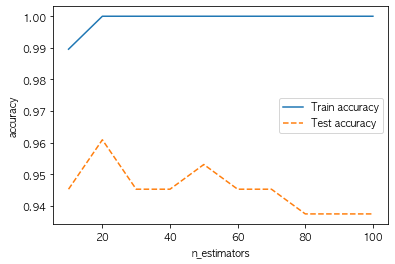

In [276]:
plt.plot(para_n_tree,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel('accuracy');plt.xlabel("n_estimators")
plt.legend()

### 트리 수 변경에 따른 모델 oob error 변화

In [277]:

oob_error = []


for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators= v_n_estimator, oob_score= True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 -rf.oob_score_)




import plotly.express as px
import numpy as np

temp = pd.DataFrame(np.arange(1,151), columns=['n_estimator'])

temp['oob_error'] = oob_error
fig = px.scatter(temp, x = 'n_estimator', y = 'oob_error')
fig.show()


temp.oob_error.argmin(), temp.oob_error.min()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Library/Fra

(36, 0.05208333333333337)

n_estimator 은 에러가 가장 낮은 36으로 설정한다

### 잎사귀 노드수 변경에 따른 모델 성능

In [280]:
train_accuracy = [] ,test_accuracy = []

# min_sample_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, n_estimators=36,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesLeaf"] = para_leaf
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,1,1.000,0.945
1,2,1.000,0.938
2,3,0.984,0.938
3,4,0.974,0.945
4,5,0.964,0.953
5,6,0.958,0.938
6,7,0.958,0.930
7,8,0.964,0.938
8,9,0.964,0.930
9,10,0.964,0.930


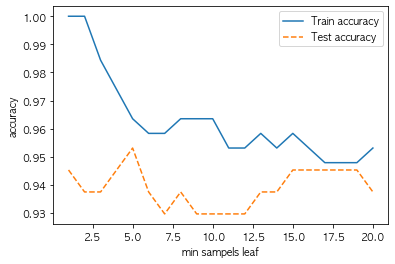

In [281]:
plt.plot(para_leaf,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_leaf,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel("accuracy")
plt.xlabel("min sampels leaf")
plt.legend()

min_samples_leaf은 성능이 높은 5로 선택

### 분리 노드의 최소 자료 수 변경에 따른 성능

In [282]:
train_accuracy = []
test_accuracy = []

# min_sample_split : 분할하기 위한 노드의 최소자료 수
para_split = [n_split * 2 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, n_estimators=36,
                              min_samples_leaf=5, min_samples_split= v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.964,0.953
1,4,0.964,0.953
2,6,0.964,0.953
3,8,0.964,0.953
4,10,0.964,0.953
5,12,0.964,0.945
6,14,0.964,0.945
7,16,0.964,0.945
8,18,0.964,0.945
9,20,0.964,0.945


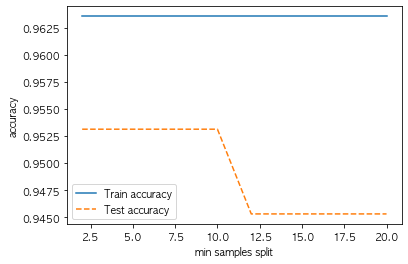

In [283]:
# 모델의 설명력 확인
plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel("accuracy")
plt.xlabel("min samples split")
plt.legend()

성능이 낮아지기 직전인 10을 선택한다

### 최대 깊이 변경에 따른 모델 성능

In [284]:
train_accuracy = []
test_accuracy = []

# max_depth : 최대 깊이 변경
para_leaf = [n_leaf for n_leaf in range(1,11)]

for v_max_depth in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, n_estimators=36,
                              min_samples_leaf=5, min_samples_split = 10,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["Depth"] = para_depth
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,Depth,Trainaccuracy,Testaccuracy
0,1,0.953,0.938
1,2,0.958,0.945
2,3,0.964,0.945
3,4,0.964,0.953
4,5,0.964,0.953
5,6,0.964,0.953
6,7,0.964,0.953
7,8,0.964,0.953
8,9,0.964,0.953
9,10,0.964,0.953


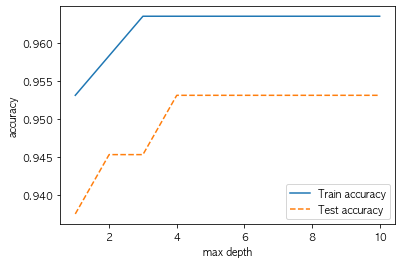

In [285]:
plt.plot(para_depth,train_accuracy,linestyle = "-",label = "Train accuracy")
plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()



성능이 높아지기 시작하는 4로 설정한다.

### 최종 모델 생성

In [286]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators=36, min_samples_leaf=5,
                                min_samples_split=10, max_depth=4)

rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

# train 모델 정확도
print("Accurcy on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))


print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accurcy on training set: 0.964
Accuracy on test set: 0.953
Confusion matrix: 
[[89  2]
 [ 4 33]]
              precision    recall  f1-score   support

           0      0.957     0.978     0.967        91
           1      0.943     0.892     0.917        37

    accuracy                          0.953       128
   macro avg      0.950     0.935     0.942       128
weighted avg      0.953     0.953     0.953       128



### graphviz로 최종 모델 생성


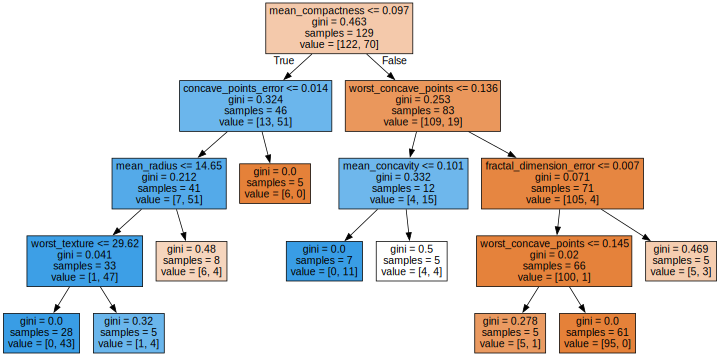

In [287]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names=v_feature_name,\
               impurity = True, filled=True)

#tree_final_0.dot그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
fixed_dot_graph = "digraph Tree {\nsize=\"10,10\";\n" + dot_graph.split('{', 1)[1]
display(graphviz.Source(fixed_dot_graph))

### 설명변수의 중요도

In [288]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.153
27,worst_concave_points,0.140
6,mean_concavity,0.112
20,worst_radius,0.102
26,worst_concavity,0.076
7,mean_concave_points,0.071
2,mean_perimeter,0.068
3,mean_area,0.041
23,worst_area,0.035
17,concave_points_error,0.032


### 설명변수 중요도

Text(0, 0.5, '변수')

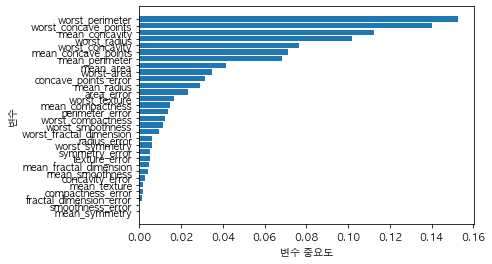

In [289]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### GridSearchCV를 이용한 최적 parameter 검색

In [1]:
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf" : para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs= -1)   #scoring에 성능을 올리고 싶은 모델을 만들고 싶음,. recall value 
grid_rf.fit(df_train_x, df_train_y)



print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

NameError: name 'para_depth' is not defined

### 기본옵션모델 성능차이

In [291]:
df_result = pd.DataFrame()
df_result['original'] = df_test_y
df_result['predict'] = y_pred
df_result

,original,predict
219,0,0
58,1,1
96,0,0
60,1,1
246,0,0
...,...,...
284,0,0
93,0,0
213,0,0
313,1,1


In [296]:
different_rows = sum(df_result['original'] != df_result['predict'])
print('전체 행:{}'.format( df_result.shape[0]))
print('예측값이 맞은 행:{}'.format( df_result.shape[0] - different_rows))
print('예측값이 틀린 행:{}'.format( different_rows))

전체 행:128
예측값이 맞은 행:122
예측값이 틀린 행:6


# 그리드 서치를 통한 최종 값으로 범주 예측하기

In [318]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators=36, min_samples_leaf=2,
                                min_samples_split=6, max_depth=3)

rf_final.fit(df_raw_x, df_raw_y)

y_pred = rf_final.predict(df_raw_x)

In [319]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [322]:
sum(df_raw_y == y_pred)

314

In [323]:
314/320

0.98125

320개 중 314개를 맞췄고 정확도는 98.1%